In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

class FootballEmbeddings:
    def __init__(self, data_file):
        self.data_file = data_file
        self.data = None
        self.model = None
        self.embeddings = None

    def read_data(self):
        # Read the provided data without specifying column names
        self.data = pd.read_csv(self.data_file, header=None)

    def preprocess_data(self):
        # Perform any necessary data preprocessing steps here
        pass

    def train_embeddings(self, vector_size=50, window=5, min_count=1, workers=4):
        # Prepare data for training
        sentences = self.data.apply(lambda row: [str(cell) for cell in row], axis=1).tolist()

        # Train Word2Vec model
        self.model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

    def embed_data(self):
        # Embed data based on matches
        self.embeddings = []
        for index, row in self.data.iterrows():
            match_embedding = np.mean([self.model.wv[str(cell)] for cell in row], axis=0)
            self.embeddings.append(match_embedding)

    def store_embeddings_to_csv(self, output_file):
        # Save embeddings to a new CSV file
        embeddings_df = pd.DataFrame(self.embeddings)
        embeddings_df.to_csv(output_file, index=False, header=False)

    def retrieve_embeddings_for_match(self, match_number):
        # Retrieve embeddings for a specific match
        return self.embeddings[match_number - 1]  # Adjust match number to zero-based indexing

# Example Usage:
if __name__ == "__main__":
    # Initialize FootballEmbeddings object
    embeddings = FootballEmbeddings('d1.csv')

    # Read and preprocess data
    embeddings.read_data()
    embeddings.preprocess_data()

    # Train embeddings
    embeddings.train_embeddings()

    # Embed data
    embeddings.embed_data()

    # Store embeddings to CSV
    embeddings.store_embeddings_to_csv('football_embeddings.csv')

    # Retrieve embeddings for a specific match
    match_number = 2  # Example: Retrieve embeddings for Match 2
    match_embeddings = embeddings.retrieve_embeddings_for_match(match_number)
    print("Embeddings for Match", match_number, ":", match_embeddings)


Embeddings for Match 2 : [-0.67580384  0.14454152  0.8397565   0.33072162 -0.6695191  -0.1339077
  1.2173334   0.9427711  -0.2760756  -1.0985433   0.29076463 -0.5726989
  0.08471261  0.2707458   0.24898843  0.5227384   0.3281855   0.47742587
 -1.0425398  -1.3649842   0.3394149   0.5269901   1.9136192  -0.16391753
  0.41440687  0.6014517  -0.6891028   0.4943048  -0.4133161   0.3641479
 -0.05739771 -1.1303505   0.72298044 -0.5156038   0.7387428   0.12812193
  0.9526243   0.70870066  0.4722062  -0.57902366  0.83269936  0.18459144
 -0.95315737  0.61062104 -0.18544747 -0.5259222   0.00592652  0.6276227
  0.42863095  0.83756894]


In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

class FootballEmbeddings:
    def __init__(self, data_file):
        self.data_file = data_file
        self.data = None
        self.model = None
        self.embeddings = None

    def read_data(self):
        # Read the provided data without specifying column names
        self.data = pd.read_csv(self.data_file, header=None)

    def preprocess_data(self):
        # Perform any necessary data preprocessing steps here
        pass

    def train_embeddings(self, vector_size=50, window=5, min_count=1, workers=4):
        # Prepare data for training
        sentences = self.data.apply(lambda row: [str(cell) for cell in row], axis=1).tolist()

        # Train Word2Vec model
        self.model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

    def embed_data(self):
        # Embed data based on matches
        self.embeddings = []
        for i in range(0, len(self.data), 11):  # Assuming each match consists of 11 rows
            match_data = self.data.iloc[i:i+11, :]  # Extract data for a single match
            match_embedding = np.mean([self.model.wv[str(cell)] for _, row in match_data.iterrows() for cell in row], axis=0)
            self.embeddings.append(match_embedding)

    def store_embeddings_to_csv(self, output_file):
        # Save embeddings to a new CSV file
        embeddings_df = pd.DataFrame(self.embeddings)
        embeddings_df.to_csv(output_file, index=False, header=False)

class MatchDetailsRetriever:
    def __init__(self, data_file):
        self.data_file = data_file
        self.data = None

    def read_data(self):
        # Read the provided data without specifying column names
        self.data = pd.read_csv(self.data_file, header=None)

    def retrieve_match_details(self, match_number):
    # Adjust match number to align with the correct index
        match_number -= 5

    # Calculate the start index of the match data
        match_data_start_index = (match_number - 1) * 11

    # Extract the details for the specified match
        match_data = self.data.iloc[match_data_start_index:match_data_start_index + 11, :]
        return match_data


# Example Usage:
if __name__ == "__main__":
    # Initialize FootballEmbeddings object
    embeddings_model = FootballEmbeddings('d1.csv')

    # Read and preprocess data
    embeddings_model.read_data()
    embeddings_model.preprocess_data()

    # Train embeddings
    embeddings_model.train_embeddings()

    # Embed data
    embeddings_model.embed_data()

    # Store embeddings to CSV
    embeddings_model.store_embeddings_to_csv('football_embeddings.csv')

    # Initialize MatchDetailsRetriever object
    retriever = MatchDetailsRetriever('d1.csv')

    # Read data for retrieval
    retriever.read_data()

    # Retrieve details for a specific match
    match_number = 135
    match_details = retriever.retrieve_match_details(match_number)
    print("Details for Match", match_number, ":", match_details)


Details for Match 135 :          0            1             2                              3
1419  1484     Match134    awayScores                              0
1420  1485  TeamEngland    isHomeTeam                       Match135
1421  1486    TeamWales    isAwayTeam                       Match135
1422  1487  TeamEngland      winnerOf                       Match135
1423  1488    TeamWales       loserOf                       Match135
1424  1489     Match135  inTournament  TournamentBritishChampionship
1425  1490     Match135        inCity                  CityNewcastle
1426  1491     Match135     inCountry                 CountryEngland
1427  1492     Match135     isNeutral                          FALSE
1428  1493     Match135        atYear                           1901
1429  1494     Match135    homeScores                              6


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
# Assuming you have the embeddings stored in a DataFrame called 'embeddings_df'
# Each row of 'embeddings_df' corresponds to the embedding of a match
embeddings_df = pd.read_csv('football_embeddings.csv', header=None)
# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings_df)

# Print similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

# Example: Find top similar matches for a specific match (e.g., Match 6)
match_index = 5  # Index of Match 6 in the embeddings DataFrame
similarities_with_match6 = similarity_matrix[match_index]

# Get indices of top similar matches (excluding the match itself)
top_similar_indices = similarities_with_match6.argsort()[::-1][1:]

# Print top similar matches
print("\nTop Similar Matches to Match 6:")
for idx in top_similar_indices[:5]:  # Print top 5 similar matches
    print(f"Match {idx + 1} - Similarity: {similarities_with_match6[idx]}")


Cosine Similarity Matrix:
[[1.         0.99800059 0.99855376 ... 0.99711982 0.99244383 0.95479576]
 [0.99800059 1.         0.99967495 ... 0.99962001 0.99580942 0.95266248]
 [0.99855376 0.99967495 1.         ... 0.99897269 0.99457636 0.95287163]
 ...
 [0.99711982 0.99962001 0.99897269 ... 1.         0.99779212 0.95562476]
 [0.99244383 0.99580942 0.99457636 ... 0.99779212 1.         0.9625841 ]
 [0.95479576 0.95266248 0.95287163 ... 0.95562476 0.9625841  1.        ]]

Top Similar Matches to Match 6:
Match 16 - Similarity: 0.9999651243235876
Match 8 - Similarity: 0.9999445231889952
Match 189 - Similarity: 0.99994210973732
Match 221 - Similarity: 0.9999385748325339
Match 233 - Similarity: 0.9999370150314942


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Load embeddings from CSV into a DataFrame
embeddings_df = pd.read_csv('football_embeddings.csv', header=None)

# Initialize KMeans with the desired number of clusters
num_clusters = 3  # You can adjust this based on your data and requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the embeddings data
kmeans.fit(embeddings_df)

# Get cluster labels for each match
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
embeddings_df['Cluster'] = cluster_labels

# Print cluster assignments
print("Cluster Assignments:")
print(embeddings_df.head())

# Analyze cluster characteristics, e.g., mean embeddings for each cluster
cluster_means = embeddings_df.groupby('Cluster').mean()
print("\nMean Embeddings for Each Cluster:")
print(cluster_means)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Assignments:
          0         1         2         3         4         5         6  \
0 -0.355491 -0.119968  0.379319 -0.048313 -0.517488 -0.020056  0.958642   
1 -0.341238 -0.206558  0.347810 -0.049453 -0.535044  0.060837  1.031197   
2 -0.335029 -0.186534  0.363205 -0.046489 -0.535358  0.056807  1.050609   
3 -0.331984 -0.186886  0.352901 -0.046210 -0.512893  0.076656  1.033162   
4 -0.340295 -0.202786  0.368542 -0.047748 -0.545221  0.058711  1.049111   

          7         8         9  ...        41        42        43        44  \
0  0.722237 -0.329742 -0.763997  ...  0.162021 -0.235325  0.526106  0.331042   
1  0.777234 -0.404053 -0.820001  ...  0.208051 -0.243684  0.573134  0.410468   
2  0.800619 -0.397754 -0.785162  ...  0.196306 -0.233339  0.571900  0.383201   
3  0.787301 -0.402880 -0.752363  ...  0.189609 -0.214198  0.539927  0.378111   
4  0.805352 -0.415052 -0.840333  ...  0.212371 -0.243840  0.592040  0.421674   

         45        46        47        48      

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

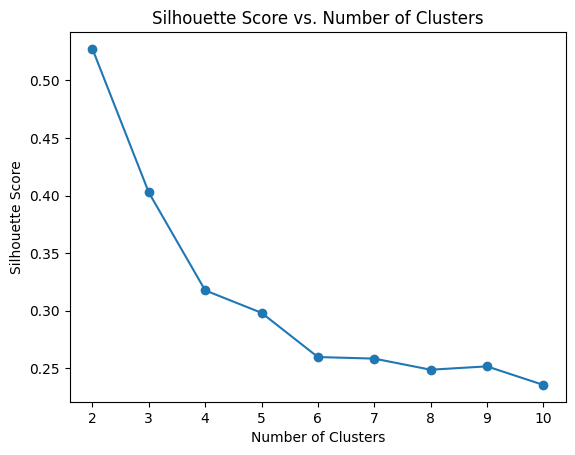

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pandas as pd

# Load embeddings from CSV into a DataFrame
embeddings_df = pd.read_csv('football_embeddings.csv', header=None)

# Perform K-means clustering with different numbers of clusters
max_clusters = 10  # Maximum number of clusters to evaluate
silhouette_scores = []

for num_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings_df.iloc[:,:-1])  # Exclude the last column (cluster labels)
    silhouette_avg = silhouette_score(embeddings_df.iloc[:,:-1], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to determine the optimal number of clusters
import matplotlib.pyplot as plt

plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


In [12]:
import csv

# Open the CSV file
with open('d1.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    # Iterate through each row in the CSV
    for row in reader:
        # Check if the row corresponds to a "winnerOf" entry
        if row['Action'] == 'winnerOf':
            # Print the team that won
            print(row['ID'], row['Team_Details'])


In [13]:
import csv

# Open the CSV file
with open('d1.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    # Iterate through each row in the CSV
    for row in reader:
        # Print the contents of each row
        print(row)


Streaming output truncated to the last 5000 lines.
{'ID': '23883', 'Team_Details': 'TeamItaly', 'Description': 'winnerOf', 'Action': 'Match2171'}
{'ID': '23884', 'Team_Details': 'TeamFrance', 'Description': 'loserOf', 'Action': 'Match2171'}
{'ID': '23885', 'Team_Details': 'Match2171', 'Description': 'inTournament', 'Action': 'TournamentFriendly'}
{'ID': '23886', 'Team_Details': 'Match2171', 'Description': 'inCity', 'Action': 'CityNaples'}
{'ID': '23887', 'Team_Details': 'Match2171', 'Description': 'inCountry', 'Action': 'CountryItaly'}
{'ID': '23888', 'Team_Details': 'Match2171', 'Description': 'isNeutral', 'Action': 'FALSE'}
{'ID': '23889', 'Team_Details': 'Match2171', 'Description': 'atYear', 'Action': '1938'}
{'ID': '23890', 'Team_Details': 'Match2171', 'Description': 'homeScores', 'Action': '1'}
{'ID': '23891', 'Team_Details': 'Match2171', 'Description': 'awayScores', 'Action': '0'}
{'ID': '23892', 'Team_Details': 'TeamScotland', 'Description': 'isHomeTeam', 'Action': 'Match2172'}


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
{'ID': '64370', 'Team_Details': 'Match5851', 'Description': 'homeScores', 'Action': '1'}
{'ID': '64371', 'Team_Details': 'Match5851', 'Description': 'awayScores', 'Action': '0'}
{'ID': '64372', 'Team_Details': 'TeamRussia', 'Description': 'isHomeTeam', 'Action': 'Match5852'}
{'ID': '64373', 'Team_Details': 'TeamWales', 'Description': 'isAwayTeam', 'Action': 'Match5852'}
{'ID': '64374', 'Team_Details': 'TeamRussia', 'Description': 'winnerOf', 'Action': 'Match5852'}
{'ID': '64375', 'Team_Details': 'TeamWales', 'Description': 'loserOf', 'Action': 'Match5852'}
{'ID': '64376', 'Team_Details': 'Match5852', 'Description': 'inTournament', 'Action': 'TournamentFifaWorldCupQualification'}
{'ID': '64377', 'Team_Details': 'Match5852', 'Description': 'inCity', 'Action': 'CityMoscow'}
{'ID': '64378', 'Team_Details': 'Match5852', 'Description': 'inCountry', 'Action': 'CountrySovietUnion'}
{'ID': '64379', 'Team_Details': 'Match5852', 'Description': 'i

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
import csv

winner_teams = []

# Open the CSV file
with open('d1.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    # Iterate through each row in the CSV
    for row in reader:
        # Check if the row corresponds to a "winnerOf" entry
        if row['Description'] == 'winnerOf':
            # Print the details of the winning team
            print("Winner of Match:", row['ID'])
            print("Team Details:", row['Team_Details'])

            # Add the winning team's details to the list
            winner_teams.append(row['Team_Details'])

# Print the list of Team_Details
print("List of Team_Details:")
print(winner_teams)


Streaming output truncated to the last 5000 lines.
Winner of Match: 42804
Team Details: TeamSouthKorea
Winner of Match: 42837
Team Details: TeamHungary
Winner of Match: 42847
Team Details: TeamBrazil
Winner of Match: 42859
Team Details: TeamPeru
Winner of Match: 42869
Team Details: TeamArgentina
Winner of Match: 42880
Team Details: TeamBrazil
Winner of Match: 42892
Team Details: TeamBrazil
Winner of Match: 42902
Team Details: TeamHaiti
Winner of Match: 42914
Team Details: TeamCostaRica
Winner of Match: 42925
Team Details: TeamVenezuela
Winner of Match: 42946
Team Details: TeamArgentina
Winner of Match: 42958
Team Details: TeamSwitzerland
Winner of Match: 42968
Team Details: TeamHaiti
Winner of Match: 42979
Team Details: TeamBrazil
Winner of Match: 43002
Team Details: TeamVenezuela
Winner of Match: 43013
Team Details: TeamNetherlands
Winner of Match: 43034
Team Details: TeamHaiti
Winner of Match: 43045
Team Details: TeamCostaRica
Winner of Match: 43056
Team Details: TeamMalaysia
Winner 

In [23]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load embeddings from CSV into a DataFrame
embeddings_df = pd.read_csv('football_embeddings.csv', header=None)

# Filter embeddings for winner teams
winner_team_embeddings = embeddings_df[embeddings_df[1].isin(winner_teams)].iloc[:, :-1]

# Check if there are winner team embeddings available
if not winner_team_embeddings.empty:
    # Calculate cosine similarity matrix for winner team embeddings
    similarity_matrix = cosine_similarity(winner_team_embeddings)

    # Print similarity matrix
    print("Cosine Similarity Matrix between Winner Teams:")
    print(similarity_matrix)
else:
    print("No embeddings found for the winning teams.")


No embeddings found for the winning teams.
